Nous souhaitons calculer la vitesse du son pour plusieurs branches acoustiques et ce dans différentes directions de la zone de Brillouin. Avant toute chose, téléchargeons la structure de bande de phonons de notre matériau.

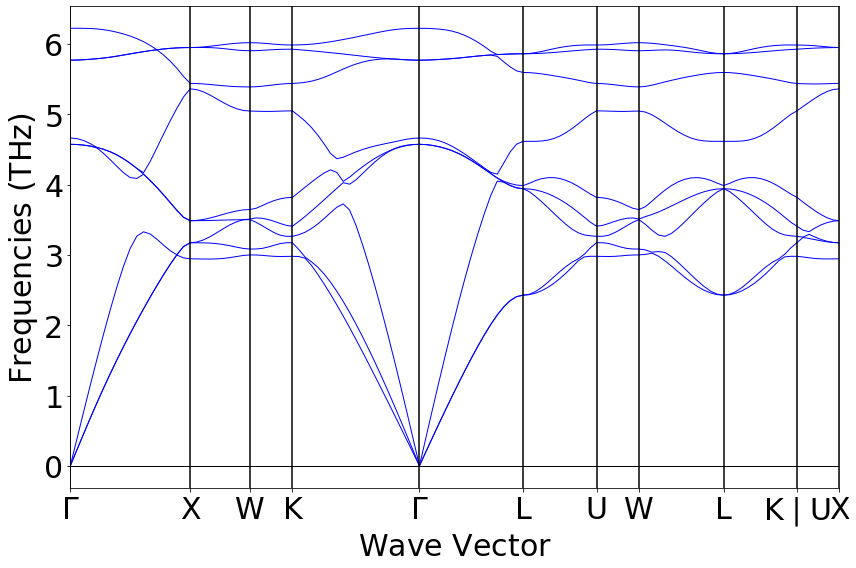

In [6]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

API_KEY = "qSvDCgTjbfREtdXQwIBl"
material_id = "mp-11869"


def download_ph_bands(material_id, API_KEY, verbose = False) :
    with MPRester(API_KEY) as m:
        ph_bands = m.get_phonon_bandstructure_by_material_id(material_id)
    if verbose == True :
        PhononBSPlotter(ph_bands).get_plot()
        plt.show()
    return ph_bands

ph_bands = download_ph_bands(material_id, API_KEY, verbose = True)

Rappelons nous ensuite que la limite acoustique est atteinte pour de grandes longueurs d'onde, et donc de basses fréquences et de petits vecteurs d'onde. Dans ce cas, la relation de dispersion est linéaire, c'est-à-dire $w = v_{s}|q|$, avec $v_{s}$ une constante valant la vitesse du son. En effet, nous avons que la vitesse du son est égale à la vitesse de groupe, c'est à dire $|v_{s}| = |\frac{\partial w}{\partial q}|$. Ceci est vérifié sur le graphique, où l'on voit qu'autour du centre de la zone de Brillouin ($\Gamma$, qui correspond bien à de petits vecteurs d'onde), la relation de dispersion est linéaire. Il nous suffit donc d'évaluer la pente de la relation de dispersion en $\Gamma$ pour obtenir la vitesse du son. Observons toutefois que celle-ci dépends de la direction choisie, et que pour chaque direction il y a trois branches acoustiques $-$ deux transverses et une longitudinale.

In the direction $\Gamma$-X,
The speed of sound for the first transverse branch is 2594.2941 m/s.
The speed of sound for the second transverse branch is 2594.2941 m/s.
The speed of sound for the longitudinal branch is 4375.2578 m/s.

In the direction $\Gamma$-L,
The speed of sound for the first transverse branch is 2332.3442 m/s.
The speed of sound for the second transverse branch is 2332.3442 m/s.
The speed of sound for the longitudinal branch is 4663.7305 m/s.

In the direction $\Gamma$-K,
The speed of sound for the first transverse branch is 2190.0678 m/s.
The speed of sound for the second transverse branch is 2597.0699 m/s.
The speed of sound for the longitudinal branch is 4591.9560 m/s.



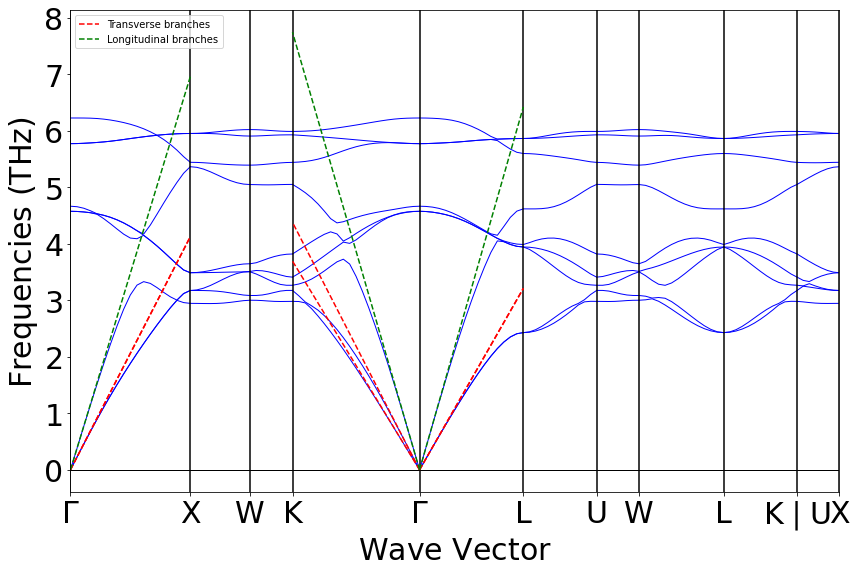

In [7]:
def get_speed_of_sound(ph_bands, verbose = False):
    data = PhononBSPlotter(ph_bands).bs_plot_data()
    indices = data.get('distances')         #indices along the x-axis
    frequencies = data.get("frequency")     #frequencies (along the y-axis)
    labels = data.get("ticks").get("label") #labels on the x-axis
    labels = labels[:-2:2] + labels[-2:]    #get unique labels
    gamma_post_index = [] #indices of zones where Gamma is at the end of the zone
    gamma_pre_index = [] #indices of zones where Gamma is at the beginning of the zone
    speed_of_sound = []
    direction = []
    for i in range(len(frequencies)):
        if frequencies[i][0][0] == 0.0 :    #if Gamma is at the beginning of the zone
            gamma_pre_index.append(i)
        if frequencies[i][0][-1] == 0.0 :   #if Gamma is at the end of the zone
            gamma_post_index.append(i)
    for i in gamma_pre_index :
        #Add the speed of sound for the three possible branches (don't forget to scale the slope - factor 200*pi - to get the right units)
        speed_of_sound.append(200*np.pi*(frequencies[i][0][1]-frequencies[i][0][0])/(indices[i][1]-indices[i][0]))
        speed_of_sound.append(200*np.pi*(frequencies[i][1][1]-frequencies[i][1][0])/(indices[i][1]-indices[i][0]))
        speed_of_sound.append(200*np.pi*(frequencies[i][2][1]-frequencies[i][2][0])/(indices[i][1]-indices[i][0]))
        direction.append(labels[i]+"-"+labels[i+1])
    for i in gamma_post_index :
        #Add the speed of sound for the three possible branches (don't forget to scale the slope - factor 200*pi - to get the right units)
        speed_of_sound.append(200*np.pi*(frequencies[i][0][-1]-frequencies[i][0][-2])/(indices[i][-2]-indices[i][-1]))
        speed_of_sound.append(200*np.pi*(frequencies[i][1][-1]-frequencies[i][1][-2])/(indices[i][-2]-indices[i][-1]))
        speed_of_sound.append(200*np.pi*(frequencies[i][2][-1]-frequencies[i][2][-2])/(indices[i][-2]-indices[i][-1]))
        direction.append(labels[i+1]+"-"+labels[i])
    if verbose :
        PhononBSPlotter(ph_bands).get_plot()
        index = 0
        for i in gamma_pre_index :
            #Print the results
            print(f"In the direction {direction[index]},")
            print(f"The speed of sound for the first transverse branch is {speed_of_sound[3*index]:.4f} m/s.")
            print(f"The speed of sound for the second transverse branch is {speed_of_sound[3*index+1]:.4f} m/s.")
            print(f"The speed of sound for the longitudinal branch is {speed_of_sound[3*index+2]:.4f} m/s.\n")
            #Plot the slopes
            plt.plot([indices[i][0],indices[i][-1]],[0,speed_of_sound[3*index]/(200*np.pi)*(indices[i][-1]-indices[i][0])],'--',color="r")
            plt.plot([indices[i][0],indices[i][-1]],[0,speed_of_sound[3*index+1]/(200*np.pi)*(indices[i][-1]-indices[i][0])],'--',color="r")
            plt.plot([indices[i][0],indices[i][-1]],[0,speed_of_sound[3*index+2]/(200*np.pi)*(indices[i][-1]-indices[i][0])],'--',color="g")
            index += 1
        for i in gamma_post_index :
            print(f"In the direction {direction[index]},")
            print(f"The speed of sound for the first transverse branch is {speed_of_sound[3*index]:.4f} m/s.")
            print(f"The speed of sound for the second transverse branch is {speed_of_sound[3*index+1]:.4f} m/s.")
            print(f"The speed of sound for the longitudinal branch is {speed_of_sound[3*index+2]:.4f} m/s.\n")
            plt.plot([indices[i][-1],indices[i][0]],[0,speed_of_sound[3*index]/(200*np.pi)*(indices[i][-1]-indices[i][0])],'--',color="r")
            plt.plot([indices[i][-1],indices[i][0]],[0,speed_of_sound[3*index+1]/(200*np.pi)*(indices[i][-1]-indices[i][0])],'--',color="r")
            plt.plot([indices[i][-1],indices[i][0]],[0,speed_of_sound[3*index+2]/(200*np.pi)*(indices[i][-1]-indices[i][0])],'--',color="g")
            index += 1
        plt.plot([],[], "--",color="r",label="Transverse branches")
        plt.plot([],[], "--",color="g",label="Longitudinal branches")
        plt.legend()
        plt.show()
    return speed_of_sound, direction

speed_of_sound, direction = get_speed_of_sound(ph_bands, verbose=True)